In [203]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import time
# from pyspark.sql.types import *
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

# from pyspark.sql.types import *
# from pyspark.sql import functions 
from sklearn.preprocessing import LabelEncoder

In [139]:
df = pd.read_csv('bank-full.csv', sep=';')

In [140]:
df.head(100)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
96,55,blue-collar,married,secondary,no,383,no,no,unknown,5,may,287,1,-1,0,unknown,no
97,60,retired,married,tertiary,no,81,yes,no,unknown,5,may,101,1,-1,0,unknown,no
98,39,technician,married,secondary,no,0,yes,no,unknown,5,may,203,1,-1,0,unknown,no


In [143]:
df.shape

(45211, 17)

In [145]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [147]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [149]:
lencoder = LabelEncoder()
#Function to encode any dataframe
def encode_label(dataFrame): #Read in dataframe
    encoded_df = dataFrame.copy() #Create a copy of the data frame to encode
    for column in encoded_df.columns: #For loop to iterate through the data frame columns
        if encoded_df[column].dtype == 'object': #Conditionalo statement to select only categorical comlumns
            encoded_df[column] = lencoder.fit_transform(encoded_df[column]) #Applying label encoding instance
    return encoded_df #returning encoded dataframe


In [151]:
df = encode_label(df)

In [153]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [182]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
X = df.iloc[:,0:16]  
X = minmax_scaler.fit_transform(X)
Y = df.iloc[:,16]
Y = Y.values
Y = Y.reshape(-1, 1)
Y = minmax_scaler.fit_transform(Y)

In [184]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, activation='sigmoid')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

In [186]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2

Epoch 1/150
4522/4522 - 6s - 1ms/step - accuracy: 0.8854 - loss: 0.3001
Epoch 2/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8903 - loss: 0.2738
Epoch 3/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8902 - loss: 0.2735
Epoch 4/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8895 - loss: 0.2727
Epoch 5/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8906 - loss: 0.2721
Epoch 6/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8904 - loss: 0.2718
Epoch 7/150
4522/4522 - 4s - 978us/step - accuracy: 0.8910 - loss: 0.2710
Epoch 8/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8905 - loss: 0.2695
Epoch 9/150
4522/4522 - 4s - 992us/step - accuracy: 0.8904 - loss: 0.2693
Epoch 10/150
4522/4522 - 4s - 974us/step - accuracy: 0.8908 - loss: 0.2678
Epoch 11/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8910 - loss: 0.2667
Epoch 12/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8910 - loss: 0.2656
Epoch 13/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8919 - loss: 0.2630
Epoch 14/150
4522/4522 - 5s - 1ms/step - accuracy: 0.8

1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step
1413/1413 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.9553 - loss: 0.1112


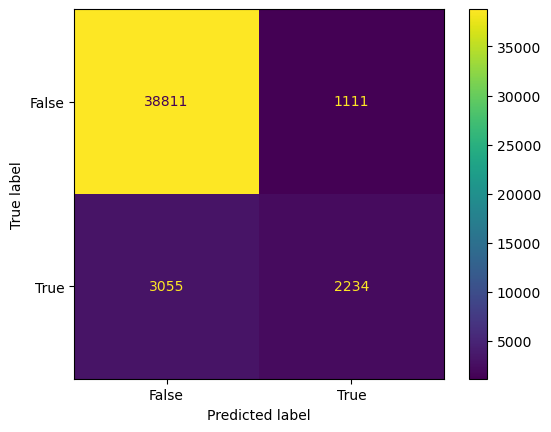

In [209]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
scores = model.evaluate(X, Y)

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 